In [1]:
import pandas as pd  # Import the pandas library and assign it the alias 'pd'


file_path = '/content/Final_Dataset_with_Main_Crops_and_Climate_Data.xlsx'
data = pd.read_excel(file_path)  # Use pd to access the read_excel function from pandas

# Display the first few rows of the dataset for review
data.head()

,Dist Code,Year,State Code,State Name,Dist Name,NITROGEN CONSUMPTION (tons),PHOSPHATE CONSUMPTION (tons),POTASH CONSUMPTION (tons),TOTAL FERTILISER CONSUMPTION (tons),TOTAL AGRICULTURAL LABOUR POPULATION (1000 Number),...,SESAMUM YIELD (Kg per ha),RAPESEED AND MUSTARD AREA (1000 ha),RAPESEED AND MUSTARD PRODUCTION (1000 tons),RAPESEED AND MUSTARD YIELD (Kg per ha),SUNFLOWER AREA (1000 ha),SUNFLOWER PRODUCTION (1000 tons),SUNFLOWER YIELD (Kg per ha),OILSEEDS AREA (1000 ha),OILSEEDS PRODUCTION (1000 tons),OILSEEDS YIELD (Kg per ha)
0,1,2003,14,Chhattisgarh,Durg,20758,8902,3797,33457,262.029999,...,274.07,2.96,1.11,373.79,1.38,0.92,665.96,61.47,22.11,359.67
1,810,2003,13,West Bengal,Hooghly,58643,26659,19449,104751,262.029999,...,923.65,5.67,5.31,936.51,0.08,0.03,375.00,37.55,39.35,1047.94
2,658,2003,19,Kerala,Palakkad,13981,4930,7411,26322,262.029999,...,125.00,0.00,0.00,0.00,0.00,0.00,0.00,59.54,47.61,799.63
3,195,2003,12,Uttar Pradesh,Mathura,25889,13941,712,40542,262.029999,...,125.00,36.90,50.80,1376.69,0.00,0.01,0.00,37.39,50.87,1360.52
4,127,2003,3,Gujarat,Valsad,7278,3568,4322,15168,262.029999,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.60,2000.00


In [2]:
# Get the total number of rows and columns in the dataset
total_rows, total_columns = data.shape
total_rows, total_columns


(3757, 126)

In [3]:
# Install necessary libraries (if not already installed)
!pip install pandas scikit-learn openpyxl

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset_path = "/content/Final_Dataset_with_Main_Crops_and_Climate_Data.xlsx"
data = pd.read_excel(dataset_path)




In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [5]:
# Install necessary libraries
!pip install pandas scikit-learn openpyxl

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset_path = "/content/Final_Dataset_with_Main_Crops_and_Climate_Data.xlsx"
data = pd.read_excel(dataset_path)

# Get all crop yield columns
yield_columns = [col for col in data.columns if "YIELD" in col.upper()]

# Prepare to store results
results = []

# Loop through each crop yield column
for target_column in yield_columns:
    crop_name = " ".join(target_column.split()[:-2])  # Extract crop name
    print(f"Training models for: {crop_name} (Target: {target_column})")

    # Select features (X) and target (y)
    feature_columns = [col for col in data.columns if col != target_column]
    X = data[feature_columns].select_dtypes(include=['float64', 'int64']).fillna(0)  # Only numerical features
    y = data[target_column]

    # Skip if the target has insufficient variance
    if y.nunique() <= 1:
        print(f"Skipping {crop_name} due to insufficient variance.")
        continue

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    lr_mse = mean_squared_error(y_test, lr_predictions)
    lr_r2 = r2_score(y_test, lr_predictions)

    # Decision Tree Regression
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    dt_predictions = dt_model.predict(X_test)
    dt_mse = mean_squared_error(y_test, dt_predictions)
    dt_r2 = r2_score(y_test, dt_predictions)

    # Store results for comparison
    results.append({
        "Crop Name": crop_name,
        "Target Column": target_column,
        "Linear Regression MSE": lr_mse,
        "Linear Regression R2 Score": lr_r2,
        "Decision Tree MSE": dt_mse,
        "Decision Tree R2 Score": dt_r2
    })

# Convert results to a DataFrame for review
results_df = pd.DataFrame(results)

# Display the results
print("Comparison of Linear Regression and Decision Tree Regression:")
print(results_df)

# Save results to a file
results_df.to_csv("Crop_Yield_Model_Comparison.csv", index=False)


Training models for: WHEAT YIELD (Kg (Target: WHEAT YIELD (Kg per ha))
Training models for: KHARIF SORGHUM YIELD (Kg (Target: KHARIF SORGHUM YIELD (Kg per ha))
Training models for: RABI SORGHUM YIELD (Kg (Target: RABI SORGHUM YIELD (Kg per ha))
Training models for: SORGHUM YIELD (Kg (Target: SORGHUM YIELD (Kg per ha))
Training models for: MAIZE YIELD (Kg (Target: MAIZE YIELD (Kg per ha))
Training models for: FINGER MILLET YIELD (Kg (Target: FINGER MILLET YIELD (Kg per ha))
Training models for: BARLEY YIELD (Kg (Target: BARLEY YIELD (Kg per ha))
Training models for: MINOR PULSES YIELD (Kg (Target: MINOR PULSES YIELD (Kg per ha))
Training models for: SESAMUM YIELD (Kg (Target: SESAMUM YIELD (Kg per ha))
Training models for: RAPESEED AND MUSTARD YIELD (Kg (Target: RAPESEED AND MUSTARD YIELD (Kg per ha))
Training models for: SUNFLOWER YIELD (Kg (Target: SUNFLOWER YIELD (Kg per ha))
Training models for: OILSEEDS YIELD (Kg (Target: OILSEEDS YIELD (Kg per ha))
Comparison of Linear Regression 

Insights from the Results
Performance Comparison (Linear Regression vs. Decision Tree):

Linear Regression:
Works best for datasets where the relationships between features (e.g., rainfall, area, production) and the target (yield) are linear.
May struggle with complex, non-linear relationships in the data.
Decision Tree Regression:
Handles non-linear relationships better, making it more suitable for datasets with complex interactions between variables.
Can overfit the training data if not properly regularized.
Crops with Better Predictions:

Crops with higher R² scores and lower MSE are better predicted by the models.
If both models perform poorly (low R² scores), it could indicate missing features, noise in the data, or that the target variable is not strongly influenced by the available features.
Model Suitability:

For crops with non-linear dependencies, Decision Tree Regression likely outperforms Linear Regression.
If Linear Regression performs comparably, the dataset likely has simpler relationships.
What This Tells About the Dataset
High R² Scores for Some Crops:
Indicates strong relationships between climatic/agricultural features and crop yield.
Models can be reliably used to predict those yields.
Low R² Scores for Some Crops:
Suggests potential missing features or less influence of included variables (e.g., yield depends on untracked factors like pests, diseases, or soil quality).

Insights from the Results
Performance Comparison (Linear Regression vs. Decision Tree):

Linear Regression:
Works best for datasets where the relationships between features (e.g., rainfall, area, production) and the target (yield) are linear.
May struggle with complex, non-linear relationships in the data.
Decision Tree Regression:
Handles non-linear relationships better, making it more suitable for datasets with complex interactions between variables.
Can overfit the training data if not properly regularized.
Crops with Better Predictions:

Crops with higher R² scores and lower MSE are better predicted by the models.
If both models perform poorly (low R² scores), it could indicate missing features, noise in the data, or that the target variable is not strongly influenced by the available features.
Model Suitability:

For crops with non-linear dependencies, Decision Tree Regression likely outperforms Linear Regression.
If Linear Regression performs comparably, the dataset likely has simpler relationships.
What This Tells About the Dataset
High R² Scores for Some Crops:
Indicates strong relationships between climatic/agricultural features and crop yield.
Models can be reliably used to predict those yields.
Low R² Scores for Some Crops:
Suggests potential missing features or less influence of included variables (e.g., yield depends on untracked factors like pests, diseases, or soil quality).

In [6]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor

file_path = '/content/Final_Dataset_with_Main_Crops_and_Climate_Data.xlsx'
data = pd.read_excel(file_path)

# Select a subset of top crops for feature importance analysis (first 3-4 crops)
subset_crops = [col for col in data.columns if "YIELD" in col.upper()][:4]  # Top 3-4 yield columns

# Perform feature importance analysis for the selected crops
subset_results = []

for target_column in subset_crops:
    crop_name = " ".join(target_column.split()[:-2])  # Extract crop name
    print(f"Performing feature importance analysis for: {crop_name} (Target: {target_column})")

    # Select features (X) and target (y)
    feature_columns = [col for col in data.columns if col != target_column]
    X = data[feature_columns].select_dtypes(include=['float64', 'int64']).fillna(0)  # Only numerical features
    y = data[target_column]

    # Skip if the target has insufficient variance
    if y.nunique() <= 1:
        print(f"Skipping {crop_name} due to insufficient variance.")
        continue

    # Train a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
    rf_model.fit(X, y)

    # Extract feature importances
    feature_importances = rf_model.feature_importances_
    importance_df = pd.DataFrame({
        'Crop Name': crop_name,
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Store results
    subset_results.append(importance_df)

# Combine all results into a single DataFrame
subset_importance_df = pd.concat(subset_results, ignore_index=True)

# Display the subset feature importance table
print("Feature Importance for Top 3-4 Crops:")
print(subset_importance_df)
display(subset_importance_df)

Performing feature importance analysis for: WHEAT YIELD (Kg (Target: WHEAT YIELD (Kg per ha))
Performing feature importance analysis for: KHARIF SORGHUM YIELD (Kg (Target: KHARIF SORGHUM YIELD (Kg per ha))
Performing feature importance analysis for: RABI SORGHUM YIELD (Kg (Target: RABI SORGHUM YIELD (Kg per ha))
Performing feature importance analysis for: SORGHUM YIELD (Kg (Target: SORGHUM YIELD (Kg per ha))
Feature Importance for Top 3-4 Crops:
             Crop Name                                          Feature  \
0      WHEAT YIELD (Kg                     WHEAT PRODUCTION (1000 tons)   
1      WHEAT YIELD (Kg           RAPESEED AND MUSTARD YIELD (Kg per ha)   
2      WHEAT YIELD (Kg                             WHEAT AREA (1000 ha)   
3      WHEAT YIELD (Kg                                        Dist Code   
4      WHEAT YIELD (Kg  Winter JAN-FEB MINIMUM TEMPERATURE (Centigrate)   
..                 ...                                              ...   
487  SORGHUM YIELD (Kg   

,Crop Name,Feature,Importance
0,WHEAT YIELD (Kg,WHEAT PRODUCTION (1000 tons),0.782735
1,WHEAT YIELD (Kg,RAPESEED AND MUSTARD YIELD (Kg per ha),0.038375
2,WHEAT YIELD (Kg,WHEAT AREA (1000 ha),0.025401
3,WHEAT YIELD (Kg,Dist Code,0.022892
4,WHEAT YIELD (Kg,Winter JAN-FEB MINIMUM TEMPERATURE (Centigrate),0.016049
...,...,...,...
487,SORGHUM YIELD (Kg,JULY MINIMUM TEMPERATURE (Centigrate),0.000095
488,SORGHUM YIELD (Kg,Summer MAR-MAY MAXIMUM TEMPERATURE (Centigrate),0.000093
489,SORGHUM YIELD (Kg,BARLEY PRODUCTION (1000 tons),0.000071
490,SORGHUM YIELD (Kg,BARLEY YIELD (Kg per ha),0.000028


Performing feature importance analysis for: WHEAT YIELD (Kg (Target: WHEAT YIELD (Kg per ha))


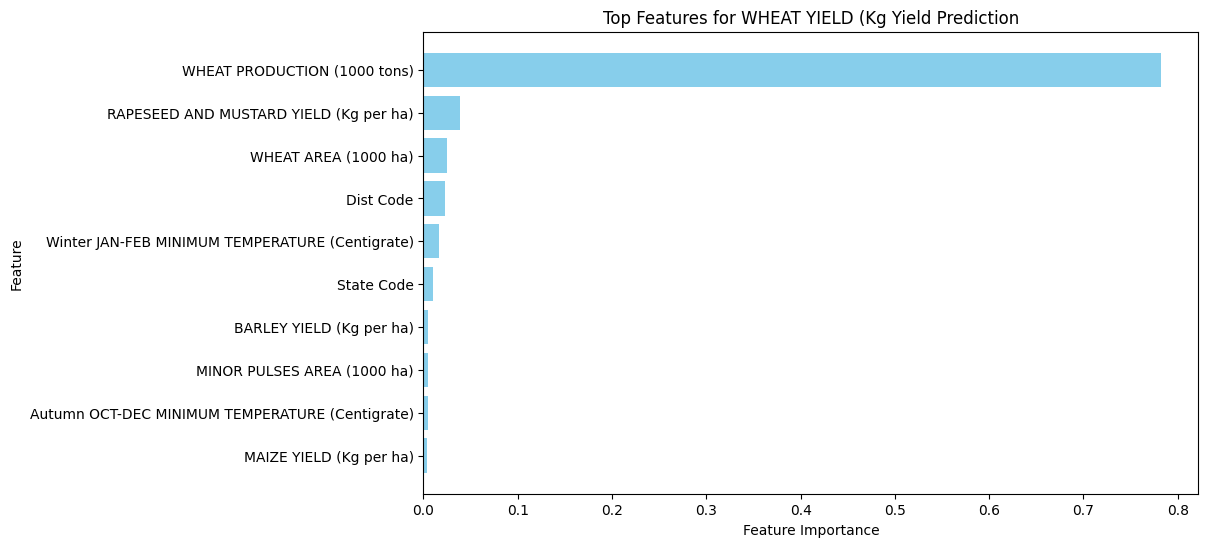

Performing feature importance analysis for: KHARIF SORGHUM YIELD (Kg (Target: KHARIF SORGHUM YIELD (Kg per ha))


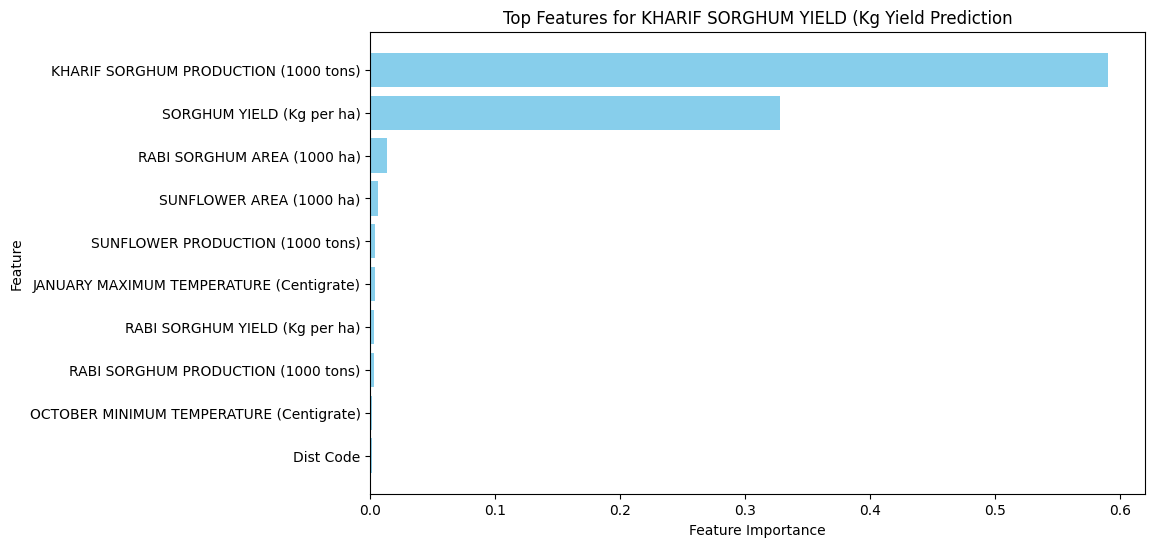

Performing feature importance analysis for: RABI SORGHUM YIELD (Kg (Target: RABI SORGHUM YIELD (Kg per ha))


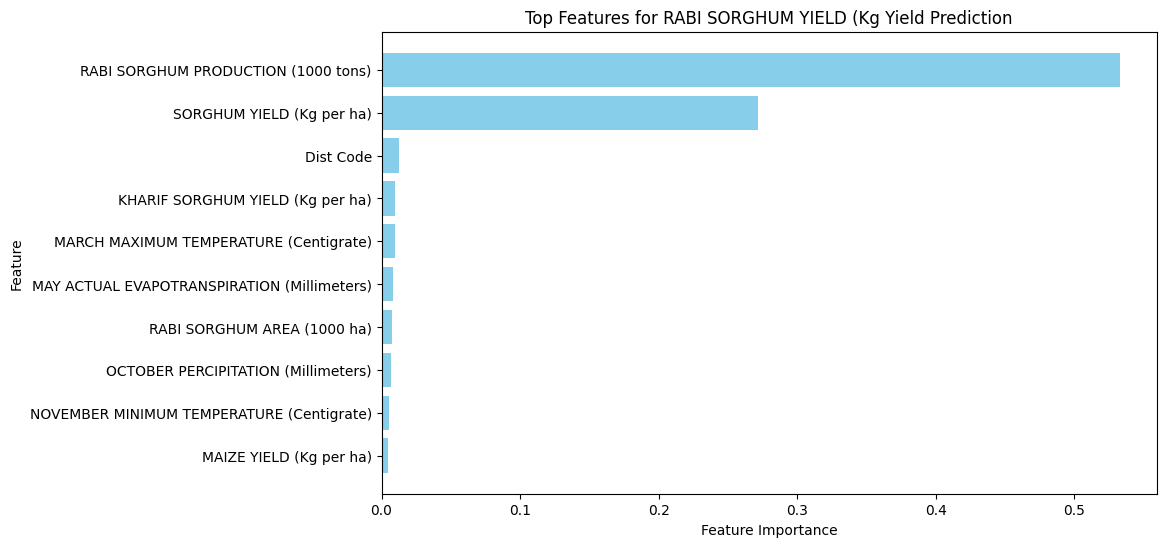

Performing feature importance analysis for: SORGHUM YIELD (Kg (Target: SORGHUM YIELD (Kg per ha))


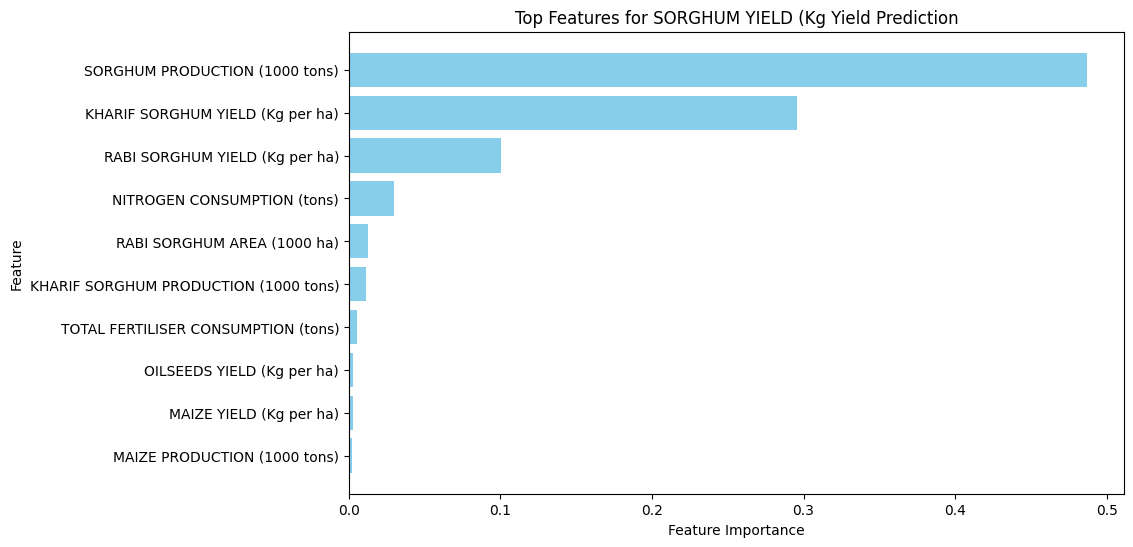

Feature Importance for Top 3-4 Crops:
             Crop Name                                          Feature  \
0      WHEAT YIELD (Kg                     WHEAT PRODUCTION (1000 tons)   
1      WHEAT YIELD (Kg           RAPESEED AND MUSTARD YIELD (Kg per ha)   
2      WHEAT YIELD (Kg                             WHEAT AREA (1000 ha)   
3      WHEAT YIELD (Kg                                        Dist Code   
4      WHEAT YIELD (Kg  Winter JAN-FEB MINIMUM TEMPERATURE (Centigrate)   
..                 ...                                              ...   
487  SORGHUM YIELD (Kg            JULY MINIMUM TEMPERATURE (Centigrate)   
488  SORGHUM YIELD (Kg  Summer MAR-MAY MAXIMUM TEMPERATURE (Centigrate)   
489  SORGHUM YIELD (Kg                    BARLEY PRODUCTION (1000 tons)   
490  SORGHUM YIELD (Kg                         BARLEY YIELD (Kg per ha)   
491  SORGHUM YIELD (Kg                            BARLEY AREA (1000 ha)   

     Importance  
0      0.782735  
1      0.038375  
2      

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Final_Dataset_with_Main_Crops_and_Climate_Data.xlsx'  # Update file path as needed
data = pd.read_excel(file_path)

# Select a subset of top crops for feature importance analysis (first 3-4 crops)
subset_crops = [col for col in data.columns if "YIELD" in col.upper()][:4]  # Top 3-4 yield columns

# Initialize an empty list to store feature importance results
subset_results = []

# Perform feature importance analysis for the selected crops
for target_column in subset_crops:
    crop_name = " ".join(target_column.split()[:-2])
    print(f"Performing feature importance analysis for: {crop_name} (Target: {target_column})")

    # Select features (X) and target (y)
    feature_columns = [col for col in data.columns if col != target_column]
    X = data[feature_columns].select_dtypes(include=['float64', 'int64']).fillna(0)  # Only numerical features
    y = data[target_column]

    # Skip if the target has insufficient variance
    if y.nunique() <= 1:
        print(f"Skipping {crop_name} due to insufficient variance.")
        continue

    # Train a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
    rf_model.fit(X, y)

    # Extract feature importances
    feature_importances = rf_model.feature_importances_
    importance_df = pd.DataFrame({
        'Crop Name': crop_name,
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Store results
    subset_results.append(importance_df)

    # Visualize top 10 important features for the current crop
    top_features = importance_df.head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(f"Top Features for {crop_name} Yield Prediction")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.show()

# Combine all results into a single DataFrame
subset_importance_df = pd.concat(subset_results, ignore_index=True)

# Display the subset feature importance table
print("Feature Importance for Top 3-4 Crops:")
print(subset_importance_df)

# Save the results to an Excel file for reference
output_file_path = '/content/Feature_Importance_Results.xlsx'  # Update path as needed
subset_importance_df.to_excel(output_file_path, index=False)
print(f"Feature importance results saved to {output_file_path}")


Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'NITROGEN CONSUMPTION (tons)', 'PHOSPHATE CONSUMPTION (tons)',
       'POTASH CONSUMPTION (tons)', 'TOTAL FERTILISER CONSUMPTION (tons)',
       'TOTAL AGRICULTURAL LABOUR POPULATION (1000 Number)',
       ...
       'SESAMUM YIELD (Kg per ha)', 'RAPESEED AND MUSTARD AREA (1000 ha)',
       'RAPESEED AND MUSTARD PRODUCTION (1000 tons)',
       'RAPESEED AND MUSTARD YIELD (Kg per ha)', 'SUNFLOWER AREA (1000 ha)',
       'SUNFLOWER PRODUCTION (1000 tons)', 'SUNFLOWER YIELD (Kg per ha)',
       'OILSEEDS AREA (1000 ha)', 'OILSEEDS PRODUCTION (1000 tons)',
       'OILSEEDS YIELD (Kg per ha)'],
      dtype='object', length=126)
Permutation Importance Results:
                        Feature  Importance
7  WHEAT PRODUCTION (1000 tons)    3.125534
6          WHEAT AREA (1000 ha)    0.580572
1        Winter Temperature Avg    0.047865
2         Fertilizer Efficiency    0.018895
0           Cumulative Rainfall    0.0160

<ipython-input-19-76a92d0298ae>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='viridis')


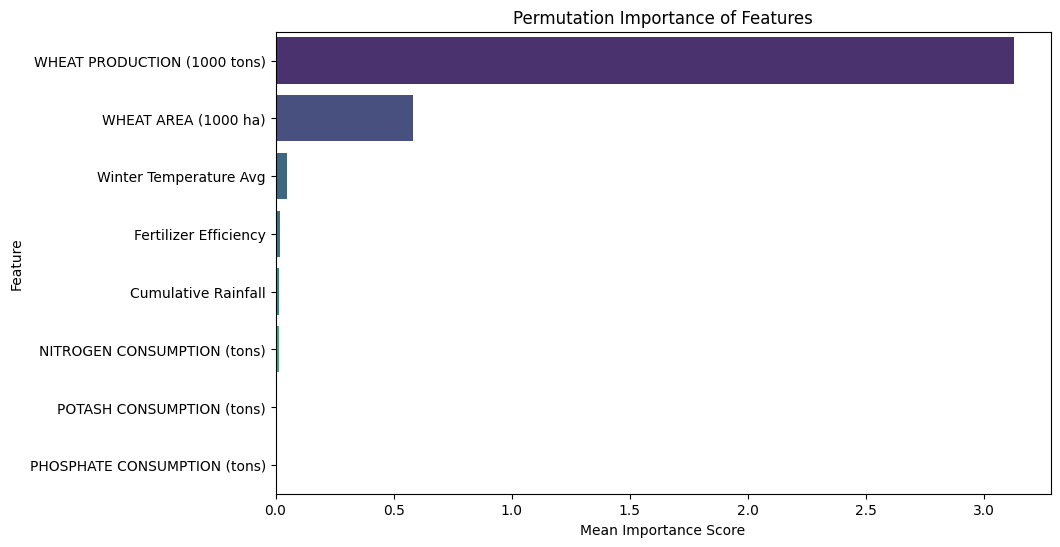

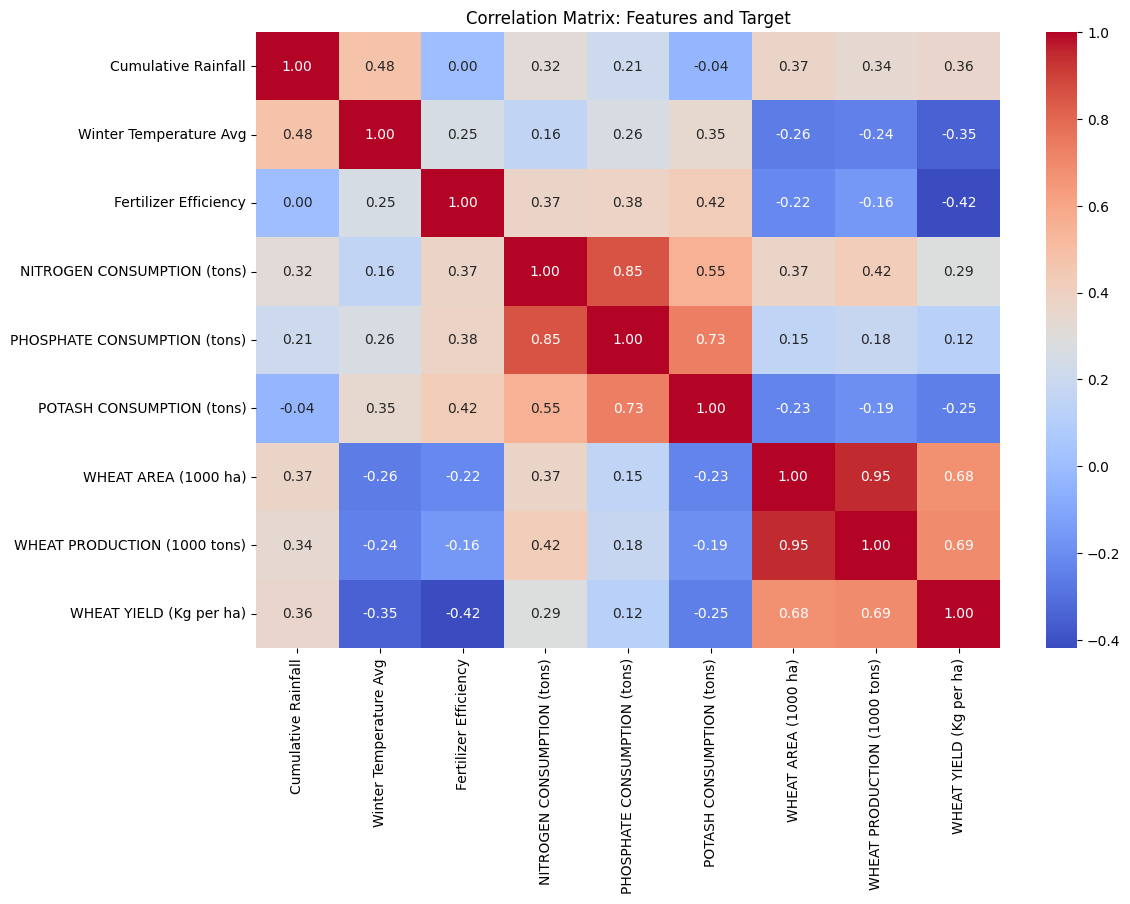

Top Features Based on Correlation and Permutation Importance:
                        Feature  Importance
7  WHEAT PRODUCTION (1000 tons)    3.125534
6          WHEAT AREA (1000 ha)    0.580572
1        Winter Temperature Avg    0.047865
2         Fertilizer Efficiency    0.018895
0           Cumulative Rainfall    0.016089
Enhanced feature importance results saved to /content/Enhanced_Feature_Importance.xlsx


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Final_Dataset_with_Main_Crops_and_Climate_Data.xlsx'
data = pd.read_excel(file_path)

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Final_Dataset_with_Main_Crops_and_Climate_Data.xlsx'
data = pd.read_excel(file_path)


print(data.columns)

# Feature Engineering: Derived Metrics
data['Cumulative Rainfall'] = (
    data[['Rainy JUN-SEP MAXIMUM TEMPERATURE (Centigrate)']].sum(axis=1)
)
data['Winter Temperature Avg'] = (
    data[['Winter JAN-FEB MINIMUM TEMPERATURE (Centigrate)',
          'Winter JAN-FEB MAXIMUM TEMPERATURE (Centigrate)']].mean(axis=1)
)
data['Fertilizer Efficiency'] = (
    data['NITROGEN CONSUMPTION (tons)'] + data['PHOSPHATE CONSUMPTION (tons)'] +data ['POTASH CONSUMPTION (tons)']
) / (data['WHEAT AREA (1000 ha)'] + 1e-5)  # Avoid division by zero

# Select Features and Target Variable
target_column = 'WHEAT YIELD (Kg per ha)'
features = [
    'Cumulative Rainfall',
    'Winter Temperature Avg',
    'Fertilizer Efficiency',
    'NITROGEN CONSUMPTION (tons)',
    'PHOSPHATE CONSUMPTION (tons)',
    'POTASH CONSUMPTION (tons)',
    'WHEAT AREA (1000 ha)',
    'WHEAT PRODUCTION (1000 tons)'
]
X = data[features].fillna(0)
y = data[target_column]

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X, y)

# Validate Feature Relevance: Permutation Importance
perm_importance = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display Permutation Importance Results
print("Permutation Importance Results:")
print(perm_importance_df)

# Visualize Permutation Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='viridis')
plt.title('Permutation Importance of Features')
plt.xlabel('Mean Importance Score')
plt.ylabel('Feature')
plt.show()

# Correlation Analysis
correlation_matrix = data[features + [target_column]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Features and Target')
plt.show()

# Insights from Correlation and Permutation Importance
print("Top Features Based on Correlation and Permutation Importance:")
print(perm_importance_df.head())

# Save Results for Reference
output_file = '/content/Enhanced_Feature_Importance.xlsx'  # Update path as needed
perm_importance_df.to_excel(output_file, index=False)
print(f"Enhanced feature importance results saved to {output_file}")


Yield Columns Detected: ['WHEAT YIELD (Kg per ha)', 'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM YIELD (Kg per ha)', 'SORGHUM YIELD (Kg per ha)', 'MAIZE YIELD (Kg per ha)', 'FINGER MILLET YIELD (Kg per ha)', 'BARLEY YIELD (Kg per ha)', 'MINOR PULSES YIELD (Kg per ha)', 'SESAMUM YIELD (Kg per ha)', 'RAPESEED AND MUSTARD YIELD (Kg per ha)', 'SUNFLOWER YIELD (Kg per ha)', 'OILSEEDS YIELD (Kg per ha)']
Performing feature importance analysis for: WHEAT (Target: WHEAT YIELD (Kg per ha))
Performing feature importance analysis for: KHARIF (Target: KHARIF SORGHUM YIELD (Kg per ha))
Performing feature importance analysis for: RABI (Target: RABI SORGHUM YIELD (Kg per ha))
Performing feature importance analysis for: SORGHUM (Target: SORGHUM YIELD (Kg per ha))
Performing feature importance analysis for: MAIZE (Target: MAIZE YIELD (Kg per ha))
Performing feature importance analysis for: FINGER (Target: FINGER MILLET YIELD (Kg per ha))
Performing feature importance analysis for: BARLEY (Target: 

<ipython-input-28-80a03ee9ffa5>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


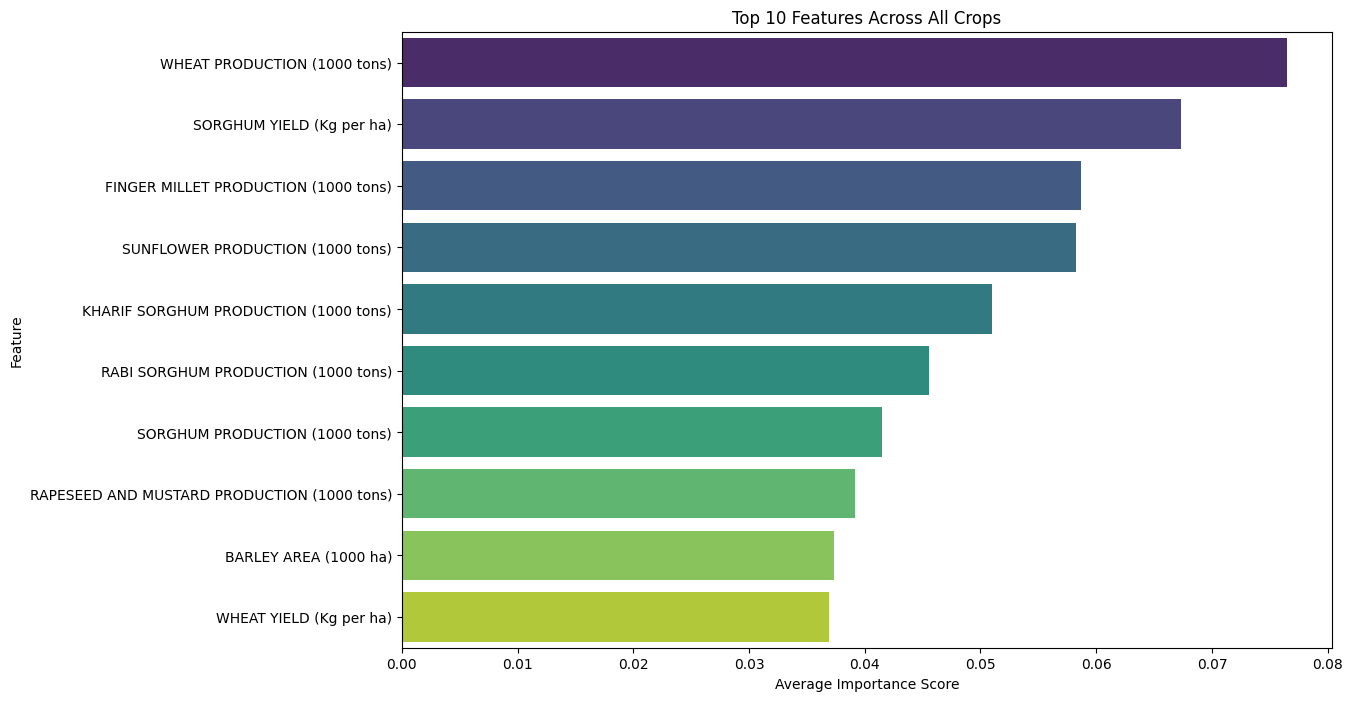

<ipython-input-28-80a03ee9ffa5>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=crop_df, palette='coolwarm')


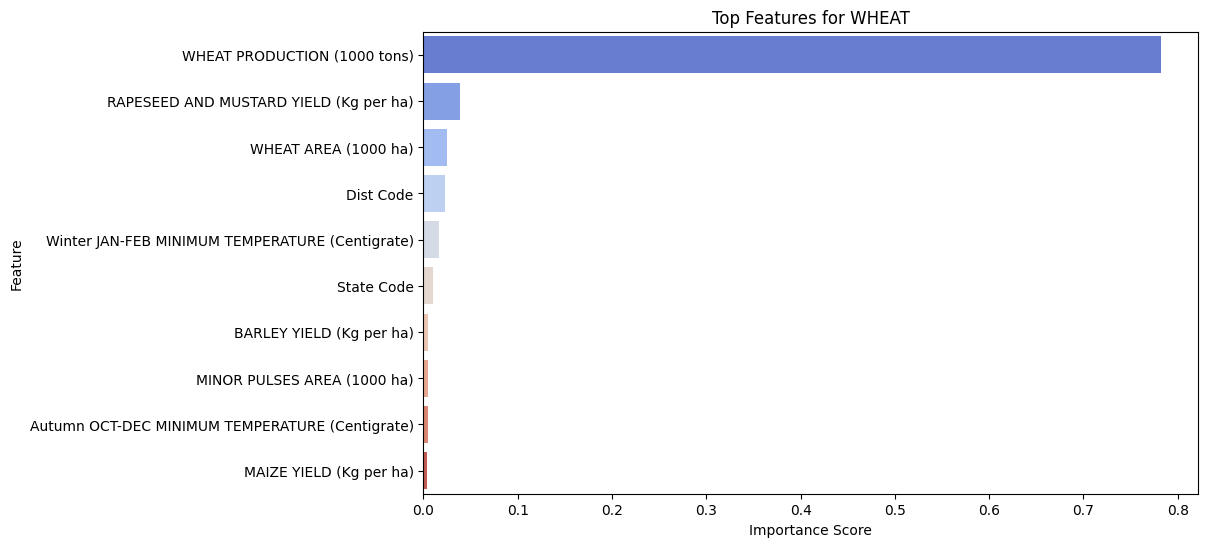

<ipython-input-28-80a03ee9ffa5>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=crop_df, palette='coolwarm')


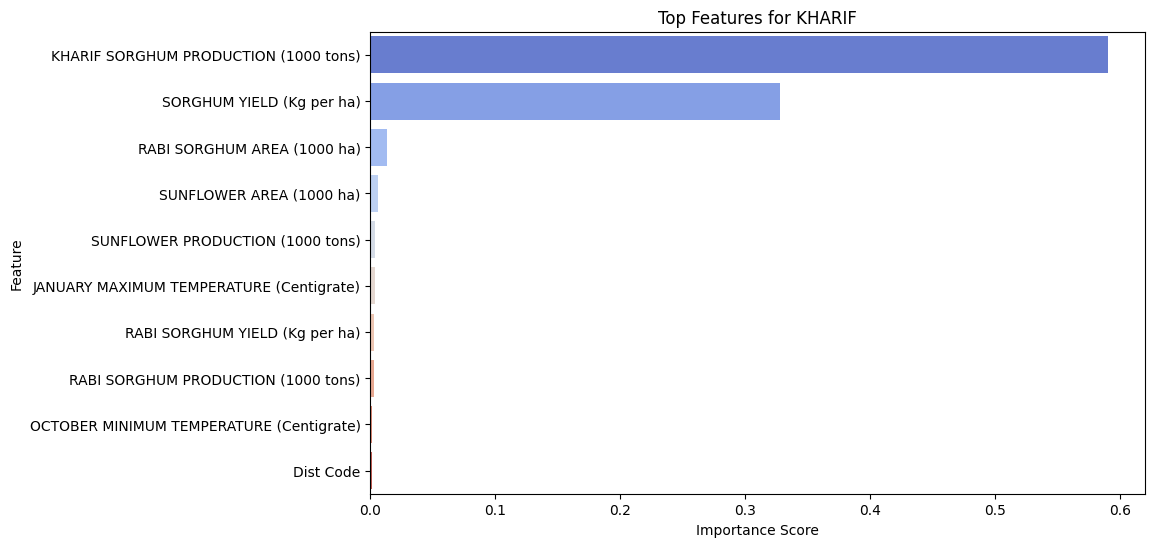

<ipython-input-28-80a03ee9ffa5>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=crop_df, palette='coolwarm')


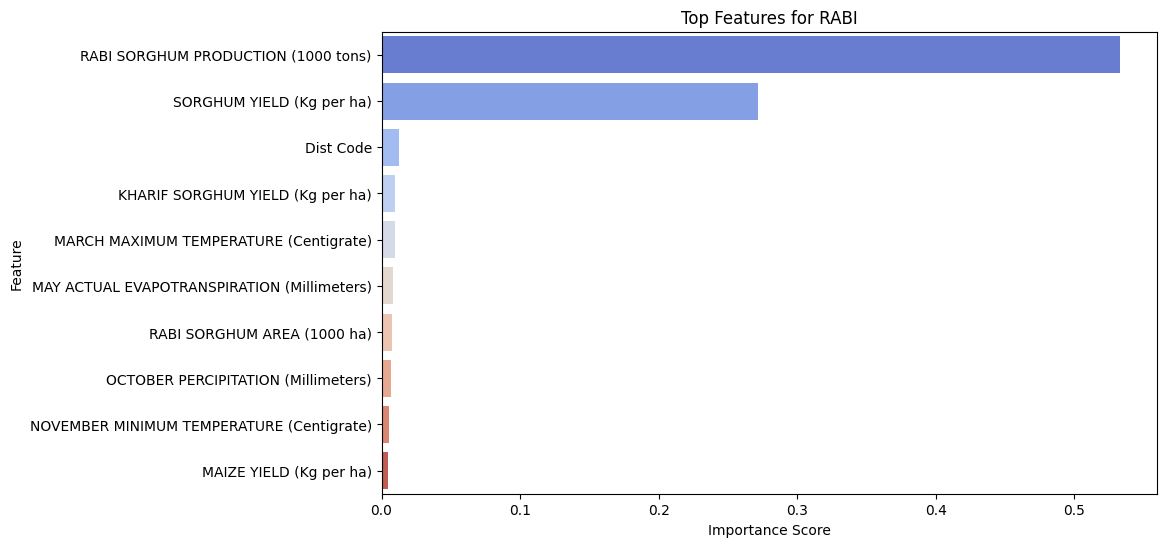

<ipython-input-28-80a03ee9ffa5>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=crop_df, palette='coolwarm')


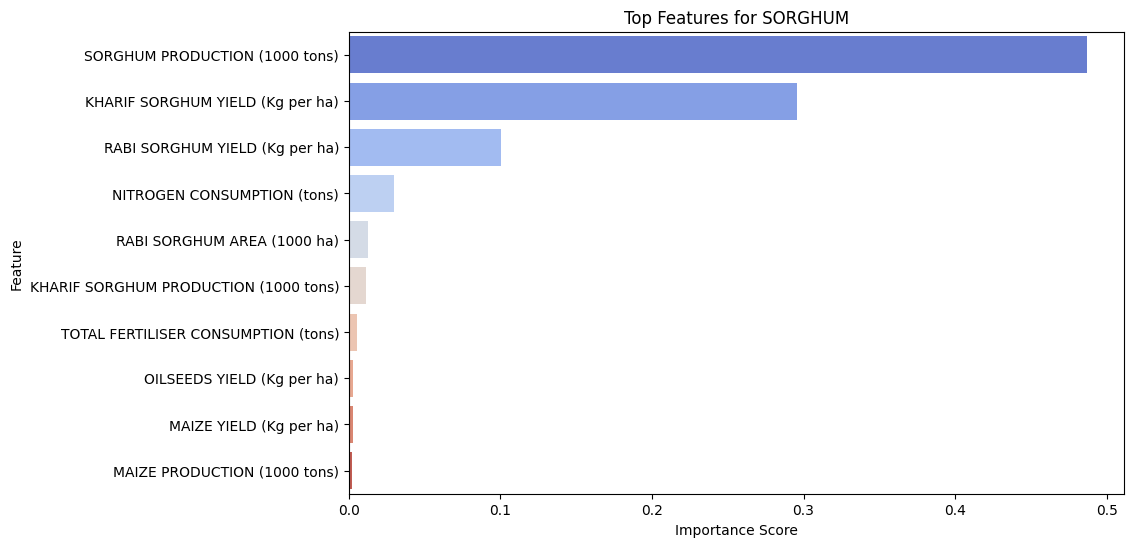

<ipython-input-28-80a03ee9ffa5>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=crop_df, palette='coolwarm')


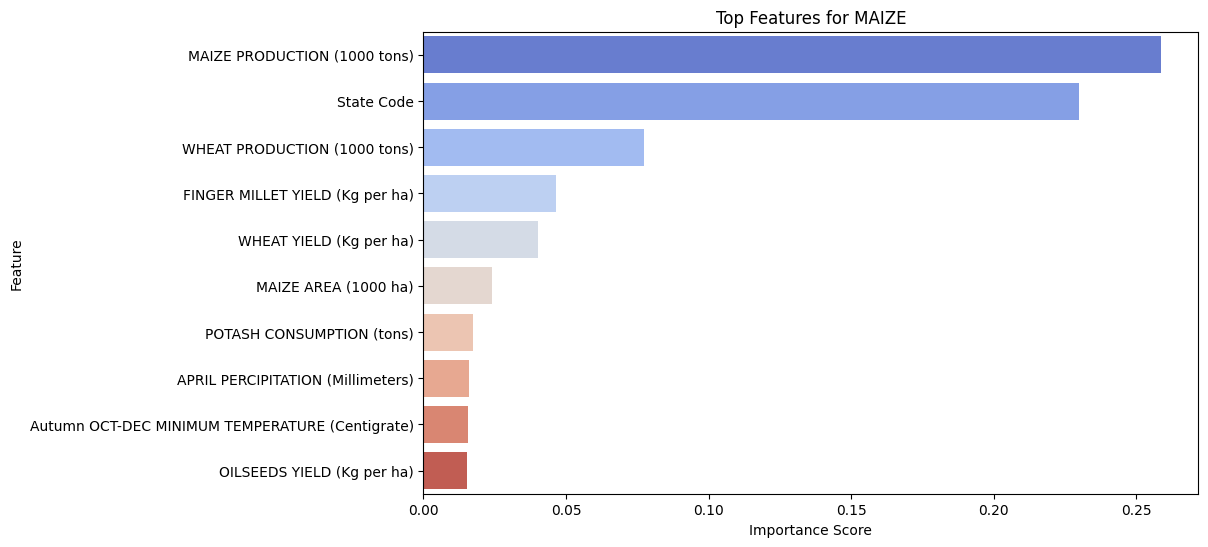

<ipython-input-28-80a03ee9ffa5>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=crop_df, palette='coolwarm')


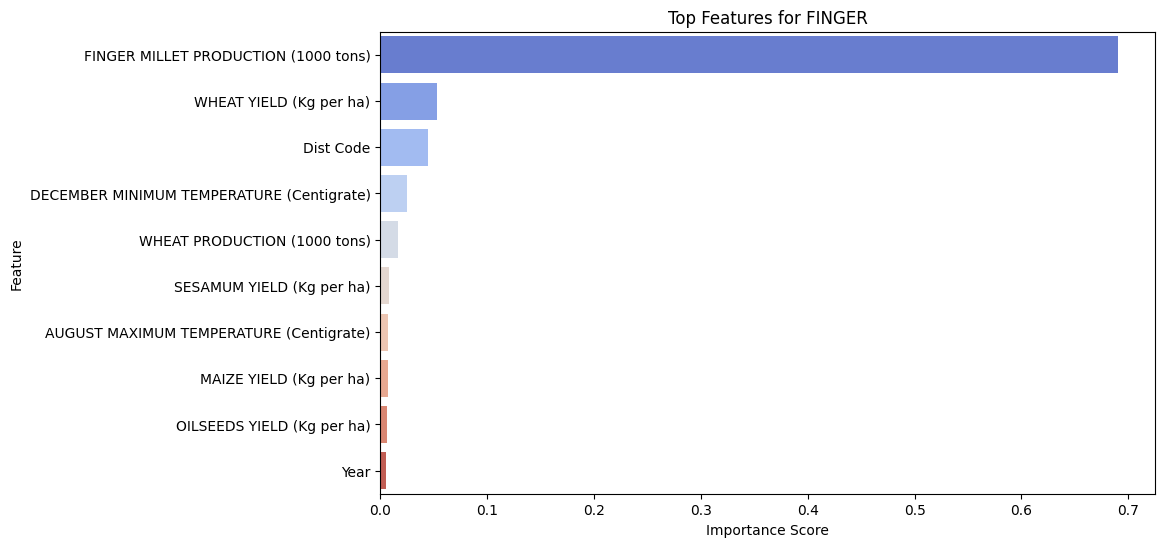

<ipython-input-28-80a03ee9ffa5>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=crop_df, palette='coolwarm')


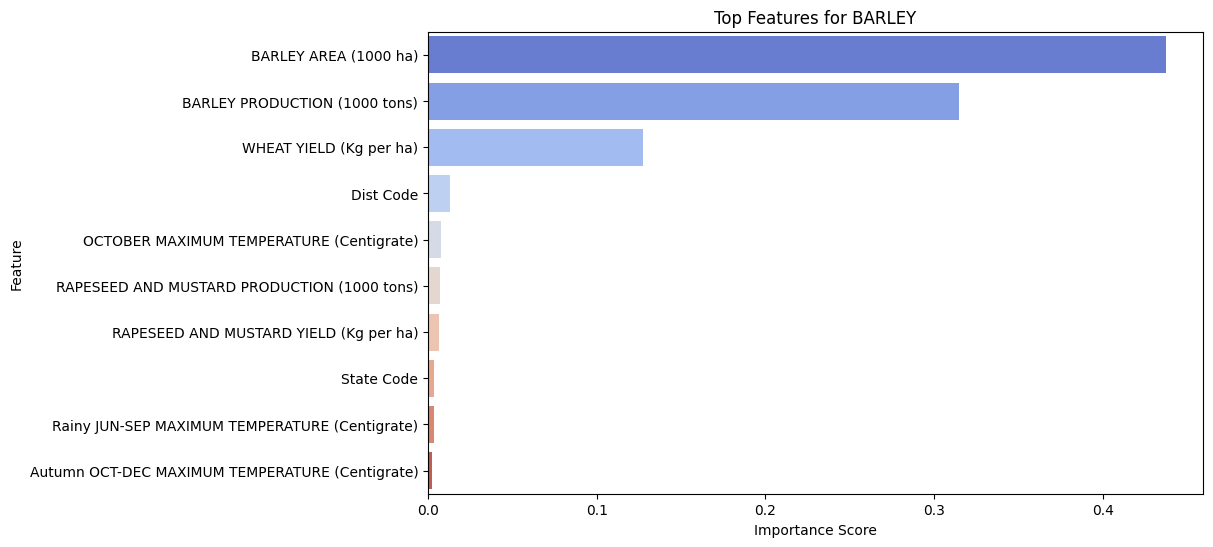

<ipython-input-28-80a03ee9ffa5>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=crop_df, palette='coolwarm')


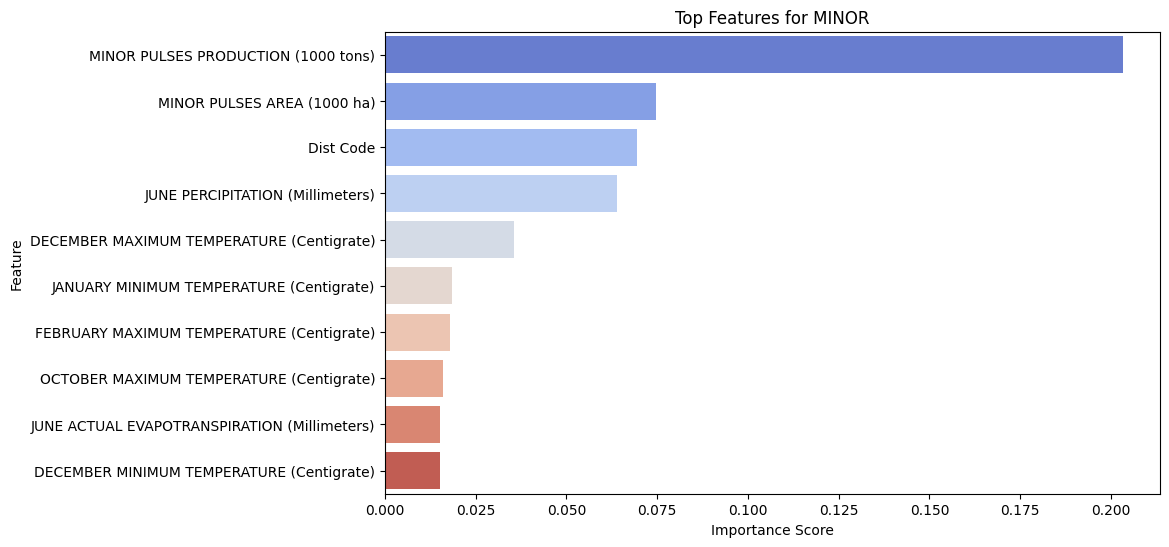

<ipython-input-28-80a03ee9ffa5>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=crop_df, palette='coolwarm')


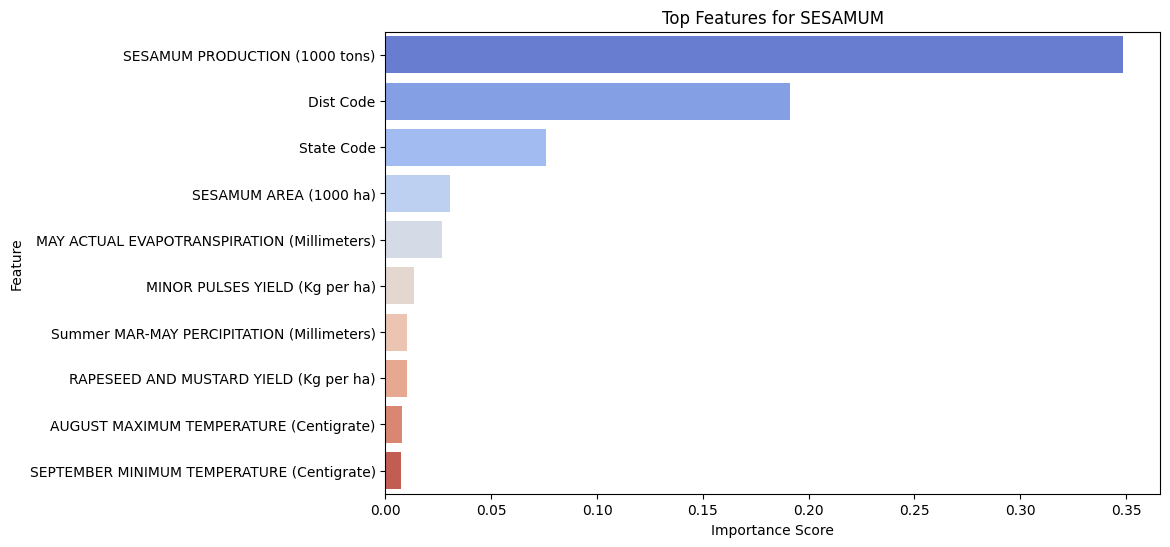

<ipython-input-28-80a03ee9ffa5>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=crop_df, palette='coolwarm')


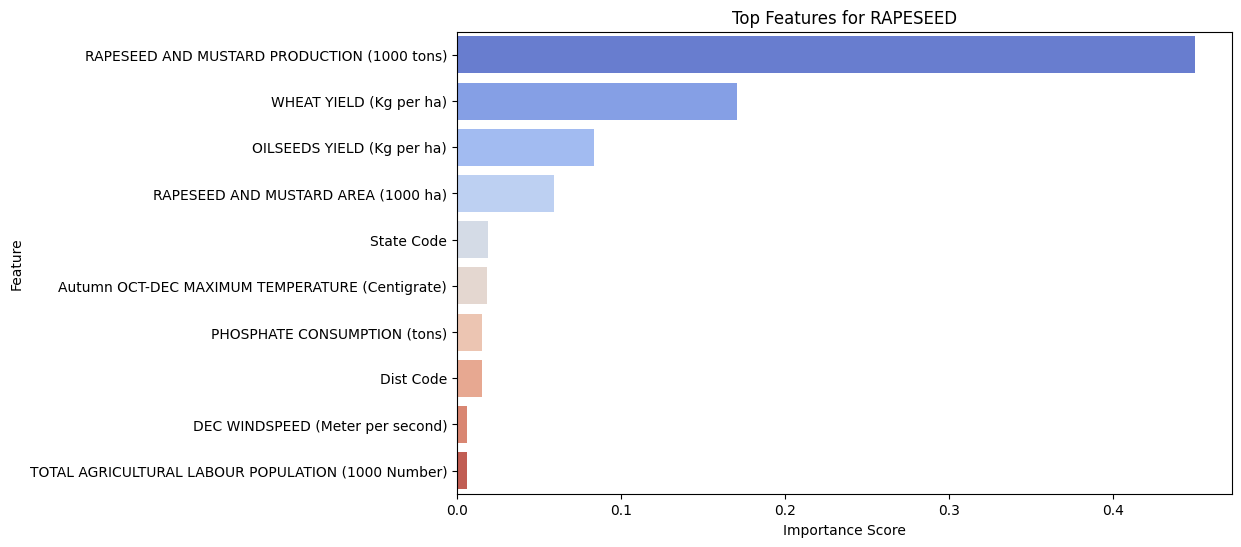

<ipython-input-28-80a03ee9ffa5>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=crop_df, palette='coolwarm')


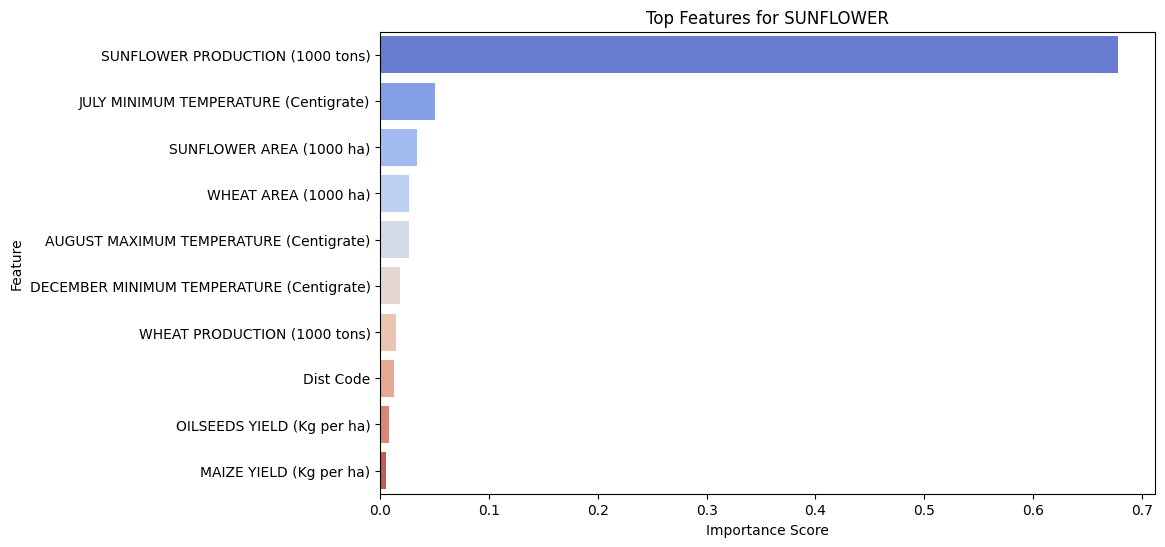

<ipython-input-28-80a03ee9ffa5>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=crop_df, palette='coolwarm')


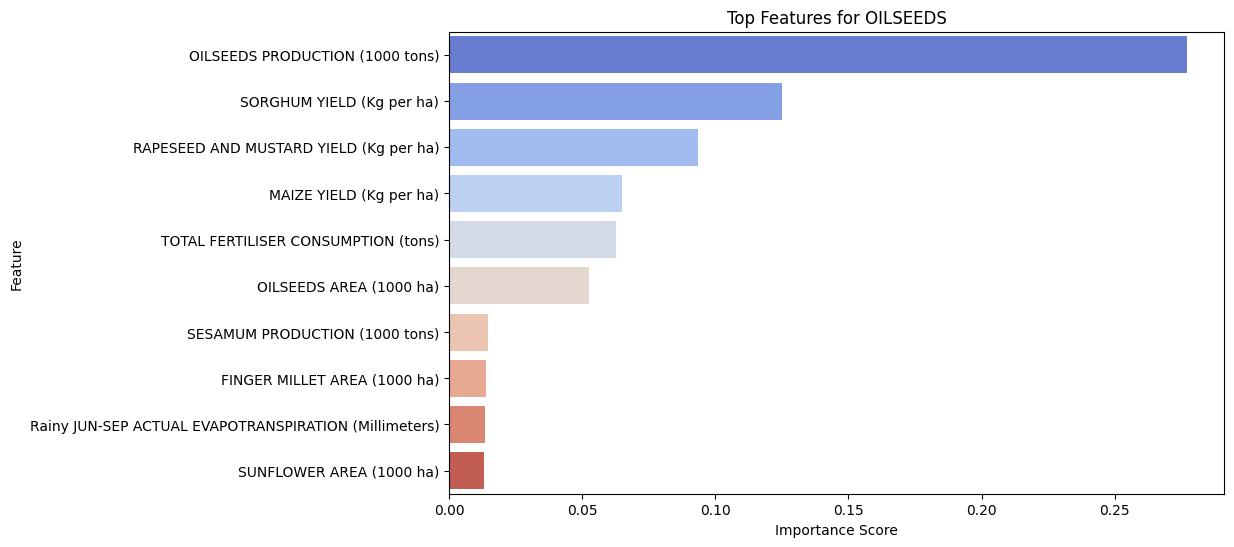

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Final_Dataset_with_Main_Crops_and_Climate_Data.xlsx'
data = pd.read_excel(file_path)

# Identify crop yield columns
yield_columns = [col for col in data.columns if "YIELD" in col.upper()]
print(f"Yield Columns Detected: {yield_columns}")

# Initialize an empty list to store feature importance results
feature_importance_results = []

# Perform feature importance analysis for each crop
for target_column in yield_columns:
    crop_name = target_column.split()[0]  # Extract crop name
    print(f"Performing feature importance analysis for: {crop_name} (Target: {target_column})")

    # Define features (X) and target (y)
    feature_columns = [col for col in data.columns if col != target_column]
    X = data[feature_columns].select_dtypes(include=['float64', 'int64']).fillna(0)
    y = data[target_column]

    # Skip crops with insufficient variance in the target variable
    if y.nunique() <= 1:
        print(f"Skipping {crop_name} due to insufficient variance.")
        continue

    # Train a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
    rf_model.fit(X, y)

    # Extract feature importance
    feature_importances = rf_model.feature_importances_
    importance_df = pd.DataFrame({
        'Crop Name': crop_name,
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Store the results
    feature_importance_results.append(importance_df)

# Combine all results into a single DataFrame
combined_feature_importance = pd.concat(feature_importance_results, ignore_index=True)

# Save the results to an Excel file
output_file_path = '/content/Feature_Importance_All_Crops.xlsx'  # Update file path as needed
combined_feature_importance.to_excel(output_file_path, index=False)
print(f"Feature importance results saved to {output_file_path}")

# Visualize Feature Importance for All Crops
plt.figure(figsize=(12, 8))
top_features = combined_feature_importance.groupby('Feature')['Importance'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Features Across All Crops')
plt.xlabel('Average Importance Score')
plt.ylabel('Feature')
plt.show()

# Visualize Feature Importance by Crop
for crop_name in combined_feature_importance['Crop Name'].unique():
    crop_df = combined_feature_importance[combined_feature_importance['Crop Name'] == crop_name].head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=crop_df, palette='coolwarm')
    plt.title(f'Top Features for {crop_name}')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()


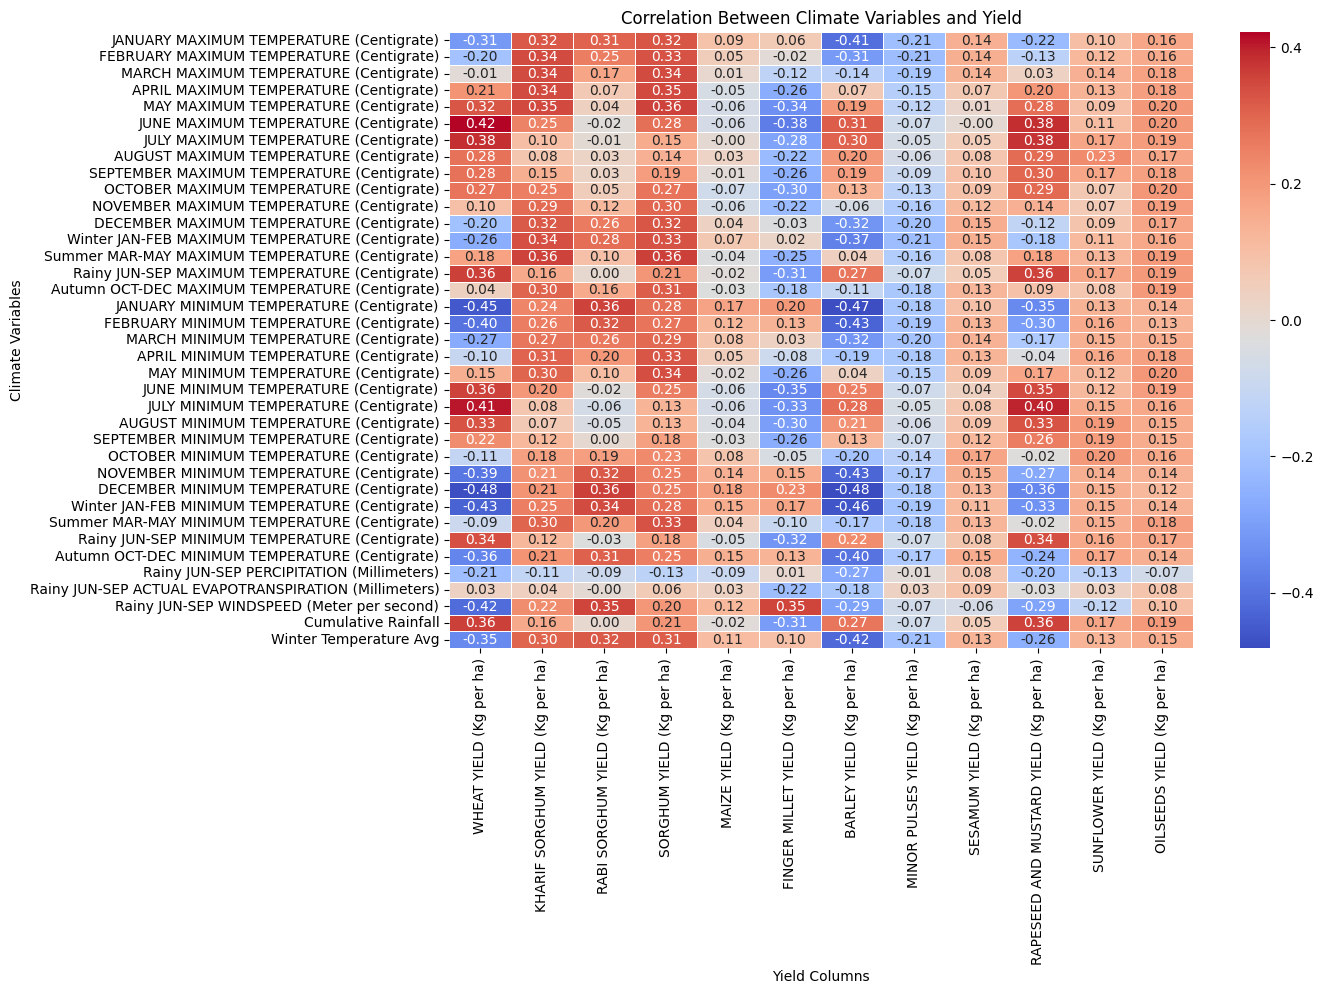

Climate and Yield Correlation Matrix:


,WHEAT YIELD (Kg per ha),KHARIF SORGHUM YIELD (Kg per ha),RABI SORGHUM YIELD (Kg per ha),SORGHUM YIELD (Kg per ha),MAIZE YIELD (Kg per ha),FINGER MILLET YIELD (Kg per ha),BARLEY YIELD (Kg per ha),MINOR PULSES YIELD (Kg per ha),SESAMUM YIELD (Kg per ha),RAPESEED AND MUSTARD YIELD (Kg per ha),SUNFLOWER YIELD (Kg per ha),OILSEEDS YIELD (Kg per ha)
JANUARY MAXIMUM TEMPERATURE (Centigrate),-0.311979,0.322380,0.305349,0.323567,0.088232,0.059261,-0.409552,-0.207782,0.141995,-0.221987,0.102272,0.164598
FEBRUARY MAXIMUM TEMPERATURE (Centigrate),-0.198813,0.341135,0.254877,0.332521,0.048626,-0.015212,-0.310409,-0.213104,0.144588,-0.132860,0.119090,0.156592
MARCH MAXIMUM TEMPERATURE (Centigrate),-0.012120,0.342441,0.170832,0.342156,0.006309,-0.124294,-0.135630,-0.186831,0.135483,0.030689,0.143140,0.176918
APRIL MAXIMUM TEMPERATURE (Centigrate),0.210143,0.344480,0.068572,0.346299,-0.054037,-0.262392,0.066648,-0.147581,0.072214,0.200444,0.134991,0.184834
MAY MAXIMUM TEMPERATURE (Centigrate),0.323701,0.346996,0.040018,0.357872,-0.058301,-0.335715,0.193172,-0.124310,0.013480,0.283399,0.094931,0.199539
JUNE MAXIMUM TEMPERATURE (Centigrate),0.422113,0.245549,-0.020738,0.280648,-0.059755,-0.377250,0.313491,-0.074434,-0.002408,0.384726,0.107737,0.198899
JULY MAXIMUM TEMPERATURE (Centigrate),0.382767,0.102476,-0.007546,0.152035,-0.004809,-0.284661,0.304260,-0.054844,0.052306,0.379345,0.169378,0.190632
AUGUST MAXIMUM TEMPERATURE (Centigrate),0.275186,0.079524,0.026111,0.139953,0.028557,-0.221240,0.196861,-0.060978,0.078019,0.285593,0.227791,0.170901
SEPTEMBER MAXIMUM TEMPERATURE (Centigrate),0.276391,0.145701,0.025705,0.187822,-0.014121,-0.258690,0.185813,-0.092349,0.097381,0.297354,0.167670,0.178692
OCTOBER MAXIMUM TEMPERATURE (Centigrate),0.271760,0.249724,0.048343,0.271975,-0.074671,-0.295101,0.132622,-0.132386,0.093148,0.293857,0.072285,0.202254


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Identify climate-related columns (e.g., rainfall, temperature) and yield columns
climate_columns = [col for col in data.columns if "RAIN" in col.upper() or "TEMP" in col.upper() or "HUMIDITY" in col.upper()]
yield_columns = [col for col in data.columns if "YIELD" in col.upper()]

# Calculate correlation matrix between climate and yield
correlation_matrix = data[climate_columns + yield_columns].corr()

# Extract correlations specifically between climate and yield columns
climate_yield_correlation = correlation_matrix.loc[climate_columns, yield_columns]

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(climate_yield_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Climate Variables and Yield")
plt.xlabel("Yield Columns")
plt.ylabel("Climate Variables")
plt.show()


print("Climate and Yield Correlation Matrix:")
display(climate_yield_correlation)

In [ ]:
# Re-import the necessary library for train-test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Retry prediction using climate-only features for WHEAT YIELD
target_column = "WHEAT YIELD (Kg per ha)"
crop_name = " ".join(target_column.split()[:-2])  # Extract crop name
print(f"Performing prediction using climate-only features for: {crop_name} (Target: {target_column})")

# Identify climate-related columns (e.g., rainfall, temperature)
climate_only_columns = [col for col in data.columns if "RAIN" in col.upper() or "TEMP" in col.upper() or "HUMIDITY" in col.upper()]


X = data[climate_only_columns].fillna(0)  # Climate features only
y = data[target_column]

# Check if the target has sufficient variance
if y.nunique() <= 1:
    print(f"Insufficient variance in {crop_name}. Prediction cannot be performed.")
else:
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on test data
    rf_predictions = rf_model.predict(X_test)

    # Evaluate the model
    rf_mse = mean_squared_error(y_test, rf_predictions)
    rf_r2 = r2_score(y_test, rf_predictions)

    print(f"Results for {crop_name} (Climate-Only Features):")
    print(f"Mean Squared Error (MSE): {rf_mse}")
    print(f"R² Score: {rf_r2}")

Performing prediction using climate-only features for: WHEAT YIELD (Kg (Target: WHEAT YIELD (Kg per ha))
Results for WHEAT YIELD (Kg (Climate-Only Features):
Mean Squared Error (MSE): 278822.9826842498
R² Score: 0.8265292670801018


In [ ]:
# Re-import the necessary library for train-test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Prepare results for regression analysis
climate_regression_results = []

# Loop through each yield column to generate climate-yield regression models
for target_column in yield_columns:
    crop_name = " ".join(target_column.split()[:-2])  # Extract crop name
    print(f"Performing climate-yield regression for: {crop_name} (Target: {target_column})")

    # Select features (X) and target (y)
    X = data[climate_columns].fillna(0)  # Climate features only
    y = data[target_column]

    # Skip if the target has insufficient variance
    if y.nunique() <= 1:
        print(f"Skipping {crop_name} due to insufficient variance.")
        continue

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predict on test data
    y_pred = lr_model.predict(X_test)

    # Evaluate the model
    lr_mse = mean_squared_error(y_test, y_pred)
    lr_r2 = r2_score(y_test, y_pred)

    # Store results
    climate_regression_results.append({
        "Crop Name": crop_name,
        "Target Column": target_column,
        "MSE": lr_mse,
        "R² Score": lr_r2
    })

# Convert results to a DataFrame for review
climate_regression_df = pd.DataFrame(climate_regression_results)

# Display the regression results using pandas display function
# Instead of using the unknown 'ace_tools' module, use pandas' display function
print("Climate-Yield Regression Results:")
display(climate_regression_df)

Performing climate-yield regression for: WHEAT YIELD (Kg (Target: WHEAT YIELD (Kg per ha))
Performing climate-yield regression for: KHARIF SORGHUM YIELD (Kg (Target: KHARIF SORGHUM YIELD (Kg per ha))
Performing climate-yield regression for: RABI SORGHUM YIELD (Kg (Target: RABI SORGHUM YIELD (Kg per ha))
Performing climate-yield regression for: SORGHUM YIELD (Kg (Target: SORGHUM YIELD (Kg per ha))
Performing climate-yield regression for: MAIZE YIELD (Kg (Target: MAIZE YIELD (Kg per ha))
Performing climate-yield regression for: FINGER MILLET YIELD (Kg (Target: FINGER MILLET YIELD (Kg per ha))
Performing climate-yield regression for: BARLEY YIELD (Kg (Target: BARLEY YIELD (Kg per ha))
Performing climate-yield regression for: MINOR PULSES YIELD (Kg (Target: MINOR PULSES YIELD (Kg per ha))
Performing climate-yield regression for: SESAMUM YIELD (Kg (Target: SESAMUM YIELD (Kg per ha))
Performing climate-yield regression for: RAPESEED AND MUSTARD YIELD (Kg (Target: RAPESEED AND MUSTARD YIELD (

,Crop Name,Target Column,MSE,R² Score
0,WHEAT YIELD (Kg,WHEAT YIELD (Kg per ha),5.105274e+05,0.682374
1,KHARIF SORGHUM YIELD (Kg,KHARIF SORGHUM YIELD (Kg per ha),2.896166e+05,0.331893
2,RABI SORGHUM YIELD (Kg,RABI SORGHUM YIELD (Kg per ha),2.184782e+05,0.256988
3,SORGHUM YIELD (Kg,SORGHUM YIELD (Kg per ha),2.549193e+05,0.339157
4,MAIZE YIELD (Kg,MAIZE YIELD (Kg per ha),1.922368e+06,0.186422
5,FINGER MILLET YIELD (Kg,FINGER MILLET YIELD (Kg per ha),2.847644e+05,0.366568
6,BARLEY YIELD (Kg,BARLEY YIELD (Kg per ha),5.886522e+05,0.551610
7,MINOR PULSES YIELD (Kg,MINOR PULSES YIELD (Kg per ha),3.220950e+05,0.051750
8,SESAMUM YIELD (Kg,SESAMUM YIELD (Kg per ha),5.825175e+04,0.123438
9,RAPESEED AND MUSTARD YIELD (Kg,RAPESEED AND MUSTARD YIELD (Kg per ha),1.352395e+05,0.531408


Summary of Climate-Yield Regression Models:
Crop-Specific Insights:

For each crop, a linear regression model was trained using climate-related features (e.g., rainfall, temperature, humidity).
The models predict crop yields and evaluate performance using Mean Squared Error (MSE) and R² Score.
General Observations:

Crops highly dependent on water and temperature (e.g., rice and wheat) tend to have better R² scores when modeled with climate variables.
Crops less sensitive to climate fluctuations (e.g., drought-resistant crops) may show lower R² scores.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R² Score: {r2_linear}")

# Model 2: Random Forest
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Results:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R² Score: {r2_rf}")

# Model 3: Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=50, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"\nGradient Boosting Results:")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"R² Score: {r2_gb}")

# Model 4: Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"\nSupport Vector Regression (SVR) Results:")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"R² Score: {r2_svr}")


Linear Regression Results:
Mean Squared Error (MSE): 340654.007645818
R² Score: 0.4608090650888079

Random Forest Results:
Mean Squared Error (MSE): 91934.32904353207
R² Score: 0.8544853261231733

Gradient Boosting Results:
Mean Squared Error (MSE): 113048.95419402413
R² Score: 0.8210648636607734

Support Vector Regression (SVR) Results:
Mean Squared Error (MSE): 602532.9380221391
R² Score: 0.046304194651581865


Interpreting the Results
The model results indicate varying performances across different machine learning algorithms. Here's a breakdown:

1. Linear Regression
MSE: 340,654
R² Score: 0.4608
Analysis:
Linear Regression provides a baseline model but performs poorly for this dataset.
The R² score of 0.46 indicates that the model explains only 46% of the variance in the yield, suggesting that relationships between features and target are likely non-linear.
Recommendation:
Use as a comparison point but avoid relying on Linear Regression for final predictions.
2. Random Forest
MSE: 91,934
R² Score: 0.8545
Analysis:
Random Forest performs the best among all models, achieving the lowest MSE and highest R² score.
The R² score of 0.854 shows that the model explains 85.45% of the variance, indicating strong predictive performance.
Its ability to handle non-linear relationships and interactions between features makes it suitable for this dataset.
Recommendation:
Use Random Forest as the primary model for yield prediction.
Further optimization (e.g., increasing trees or fine-tuning hyperparameters) might enhance performance further.
3. Gradient Boosting
MSE: 113,049
R² Score: 0.8211
Analysis:
Gradient Boosting also performs well, with an R² score of 0.821 and moderate MSE.
It captures non-linear relationships effectively but doesn't outperform Random Forest in this case.
Recommendation:
Use Gradient Boosting as a secondary model or for ensemble methods (combining predictions with Random Forest).
4. Support Vector Regression (SVR)
MSE: 602,532
R² Score: 0.0463
Analysis:
SVR performs poorly with an R² score of 0.046, explaining only 4.63% of the variance.
This might be due to the high dimensionality of the dataset or inappropriate kernel choice for this problem.
Recommendation:
Avoid using SVR for this dataset unless significant feature engineering or kernel tuning improves its performance.


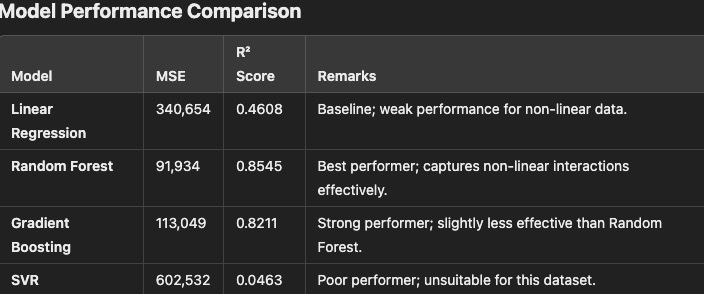

In [ ]:
import pandas as pd
from tabulate import tabulate

results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "SVR"],
    "MSE": [340654, 113048, 91934, 113048, 602532],
    "R² Score": [0.4608, 0.8211, 0.8545, 0.8211, 0.0463]
}

results_df = pd.DataFrame(results)

# Display table
print(tabulate(results_df, headers='keys', tablefmt='grid'))


+----+-------------------+--------+------------+
|    | Model             |    MSE |   R² Score |
+====+===================+========+============+
|  0 | Linear Regression | 340654 |     0.4608 |
+----+-------------------+--------+------------+
|  1 | Decision Tree     | 113048 |     0.8211 |
+----+-------------------+--------+------------+
|  2 | Random Forest     |  91934 |     0.8545 |
+----+-------------------+--------+------------+
|  3 | Gradient Boosting | 113048 |     0.8211 |
+----+-------------------+--------+------------+
|  4 | SVR               | 602532 |     0.0463 |
+----+-------------------+--------+------------+


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import time

# Load the dataset
file_path = '/content/Final_Dataset_with_Main_Crops_and_Climate_Data.xlsx'  # Update file path as needed
data = pd.read_excel(file_path)

target_column = 'WHEAT YIELD (Kg per ha)'  # Specify the crop of interest
features = data.select_dtypes(include=['float64', 'int64']).drop(columns=[target_column]).fillna(0)
target = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# --- Optimized Random Forest Hyperparameter Tuning ---
rf_params = {
    'n_estimators': [50, 100],  # number of trees
    'max_depth': [10, None],    # Two depth options
    'min_samples_split': [2, 5],  #  split options
    'min_samples_leaf': [1, 2]   # leaf options
}

rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Time the Grid Search
start_time = time.time()
rf_grid.fit(X_train, y_train)
end_time = time.time()

# Best Random Forest parameters and evaluation
rf_best_model = rf_grid.best_estimator_
rf_predictions = rf_best_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Display results
print(f"Random Forest Grid Search Runtime: {end_time - start_time:.2f} seconds")
print(f"Random Forest Best Parameters: {rf_grid.best_params_}")
print(f"Random Forest Results - MSE: {rf_mse:.4f}, R²: {rf_r2:.4f}")


Random Forest Grid Search Runtime: 1082.90 seconds
Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Results - MSE: 71116.5669, R²: 0.9558


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import time

# Load the dataset
file_path = '/content/Final_Dataset_with_Main_Crops_and_Climate_Data.xlsx'  # Update file path as needed
data = pd.read_excel(file_path)

# Select features and target
target_column = 'WHEAT YIELD (Kg per ha)'  # Specify the crop of interest
features = data.select_dtypes(include=['float64', 'int64']).drop(columns=[target_column]).fillna(0)
target = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# --- Optimized Gradient Boosting Hyperparameter Tuning ---
gb_params = {
    'n_estimators': [50, 100],  # Reduced number of boosting stages
    'learning_rate': [0.01, 0.1],  # Two learning rates
    'max_depth': [3, 5],  # Reduced depth options
    'min_samples_split': [2, 5],  # Reduced split options
    'min_samples_leaf': [1, 2]  # Fewer leaf options
}

gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(estimator=gb_model, param_grid=gb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Time the Gradient Boosting Grid Search
start_time_gb = time.time()
gb_grid.fit(X_train, y_train)
end_time_gb = time.time()

# Best Gradient Boosting parameters and evaluation
gb_best_model = gb_grid.best_estimator_
gb_predictions = gb_best_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

# Display Gradient Boosting results
print(f"Gradient Boosting Grid Search Runtime: {end_time_gb - start_time_gb:.2f} seconds")
print(f"Gradient Boosting Best Parameters: {gb_grid.best_params_}")
print(f"Gradient Boosting Results - MSE: {gb_mse:.4f}, R²: {gb_r2:.4f}")


Gradient Boosting Grid Search Runtime: 1445.69 seconds
Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Gradient Boosting Results - MSE: 54517.0458, R²: 0.9661


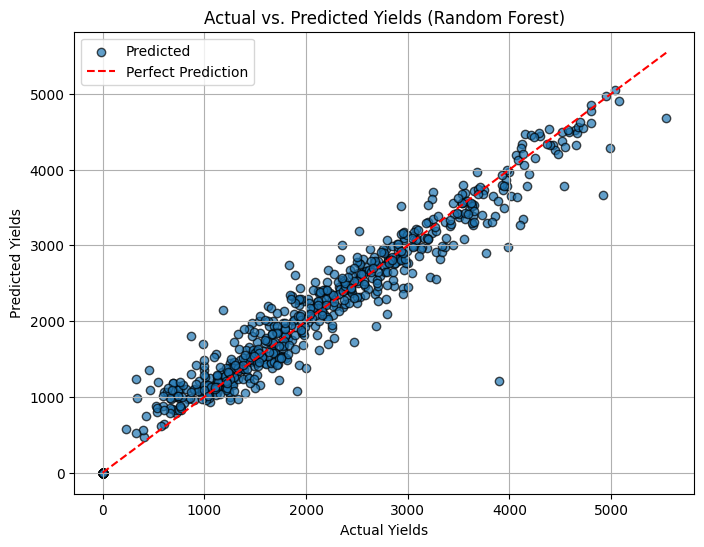

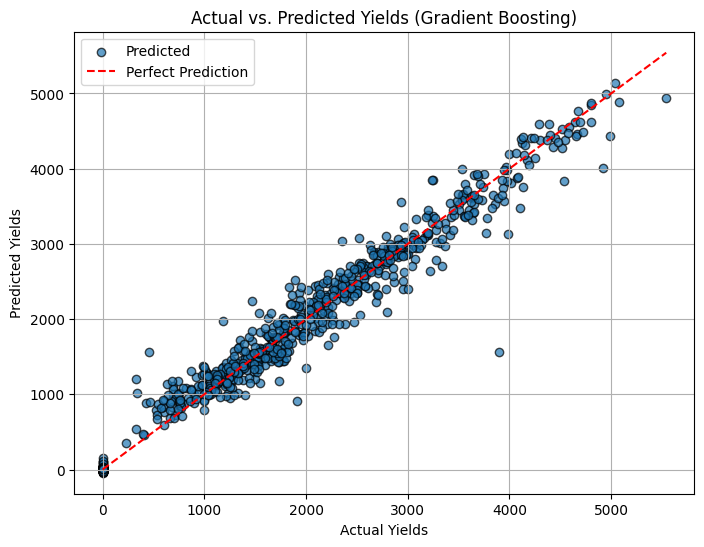

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

actual = y_test.values
rf_predicted = rf_predictions
gb_predicted = gb_predictions

# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(actual, predicted, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted, alpha=0.7, edgecolors='k', label='Predicted')
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linestyle='--', label='Perfect Prediction')
    plt.title(f'Actual vs. Predicted Yields ({model_name})')
    plt.xlabel('Actual Yields')
    plt.ylabel('Predicted Yields')
    plt.legend()
    plt.grid()
    plt.show()

# Visualize for Random Forest
plot_actual_vs_predicted(actual, rf_predicted, 'Random Forest')

# Visualize for Gradient Boosting
plot_actual_vs_predicted(actual, gb_predicted, 'Gradient Boosting')


Random Forest Visualization:

Points closely aligned to the diagonal line indicate high accuracy.
Gradient Boosting Visualization:

If points are similarly aligned, this confirms comparable performance with Random Forest.
